In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
file_path = r"C:\Users\lilkl\OneDrive\Dokumenty\df.csv"
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


## Preprocessing the data


In [15]:
# Dropping the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

# Separating the features and the target variable
X = df.drop('class', axis=1)
y = df['class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Logistic regression

In [16]:
# Initializing the Logistic Regression model
logistic_model = LogisticRegression()

# Fitting the model to the training data
logistic_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy,"\n") 
print(conf_matrix, "\n")
print(class_report)



0.7931125131440588 

[[ 812  532]
 [ 255 2205]] 

              precision    recall  f1-score   support

           0       0.76      0.60      0.67      1344
           1       0.81      0.90      0.85      2460

    accuracy                           0.79      3804
   macro avg       0.78      0.75      0.76      3804
weighted avg       0.79      0.79      0.79      3804



In [17]:
# Setting up the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2']
}

# Create a base model
log_reg = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_params = grid_search.best_params_
print(best_params)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [18]:
# Creating the Logistic Regression model with the best parameters
optimized_log_reg = LogisticRegression(C=1, penalty='l2', solver='newton-cg', random_state=42)

# Fitting the model
optimized_log_reg.fit(X_train_scaled, y_train)

# Making predictions
y_pred_optimized = optimized_log_reg.predict(X_test_scaled)

# Evaluating the model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
class_report_optimized = classification_report(y_test, y_pred_optimized)

# Print the evaluation results
print("Accuracy:", accuracy_optimized)
print("Confusion Matrix:\n", conf_matrix_optimized)
print("Classification Report:\n", class_report_optimized)


Accuracy: 0.7931125131440588
Confusion Matrix:
 [[ 812  532]
 [ 255 2205]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.60      0.67      1344
           1       0.81      0.90      0.85      2460

    accuracy                           0.79      3804
   macro avg       0.78      0.75      0.76      3804
weighted avg       0.79      0.79      0.79      3804



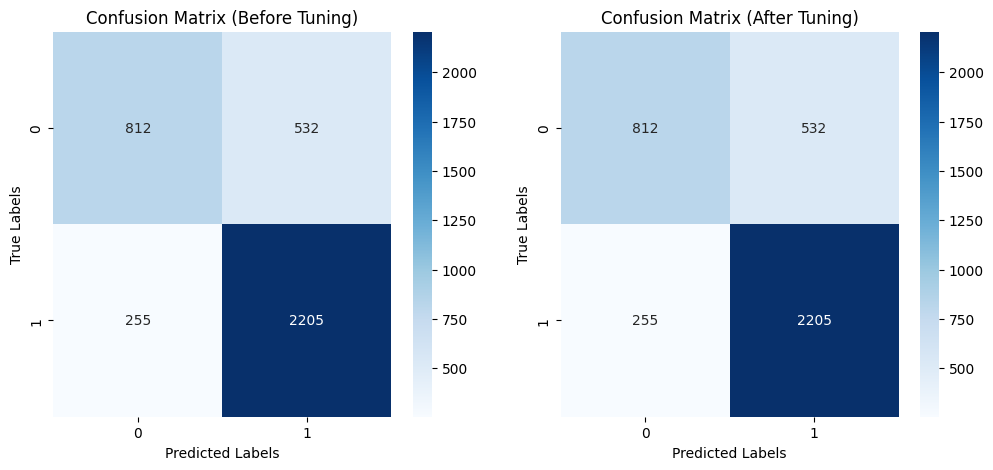

In [20]:

# Confusion Matrix Comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Before Tuning)')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(confusion_matrix(y_test, y_pred_optimized), annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (After Tuning)')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()

## Linear regression

In [5]:
# Preparing data for Linear Regression
# Using 'fDist' as the target variable and the rest as features
X_lr = df.drop(['class', 'fDist'], axis=1)  # Dropping 'class' as it's not needed for regression
y_lr = df['fDist']

# Splitting the dataset into training and testing sets for Linear Regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Standardizing the features (normalization)
scaler_lr = StandardScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)
X_test_lr_scaled = scaler_lr.transform(X_test_lr)

# Training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_lr_scaled, y_train_lr)

# Predicting on the test set
y_pred_lr = linear_model.predict(X_test_lr_scaled)

# Evaluating the model
mse = mean_squared_error(y_test_lr, y_pred_lr)
r2 = r2_score(y_test_lr, y_pred_lr)

print(mse, "\n")
print(r2)



4041.3190222414128 

0.27208045493109045


## Decision Tree

In [6]:
# Training a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_dt = decision_tree_model.predict(X_test_scaled)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(accuracy_dt, "\n") 
print(conf_matrix_dt, "\n")
print(class_report_dt)

0.812565720294427 

[[ 991  353]
 [ 360 2100]] 

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1344
           1       0.86      0.85      0.85      2460

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



## Random Forest Classifier

In [7]:
# Training a Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(accuracy_rf,'\n') 
print(conf_matrix_rf, '\n') 
print(class_report_rf)

0.8832807570977917 

[[1048  296]
 [ 148 2312]] 

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1344
           1       0.89      0.94      0.91      2460

    accuracy                           0.88      3804
   macro avg       0.88      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804



In [8]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees (more trees give better performance, but take longer to run)
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_params = grid_search.best_params_
best_params



Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [11]:
# Training the Random Forest model with the best parameters
optimized_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

optimized_rf_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_optimized_rf = optimized_rf_model.predict(X_test_scaled)

# Evaluating the optimized model
accuracy_optimized_rf = accuracy_score(y_test, y_pred_optimized_rf)
conf_matrix_optimized_rf = confusion_matrix(y_test, y_pred_optimized_rf)
class_report_optimized_rf = classification_report(y_test, y_pred_optimized_rf)

print(accuracy_optimized_rf, "\n")
print(conf_matrix_optimized_rf, "\n")
print(class_report_optimized_rf)



0.8832807570977917 

[[1048  296]
 [ 148 2312]] 

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1344
           1       0.89      0.94      0.91      2460

    accuracy                           0.88      3804
   macro avg       0.88      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804



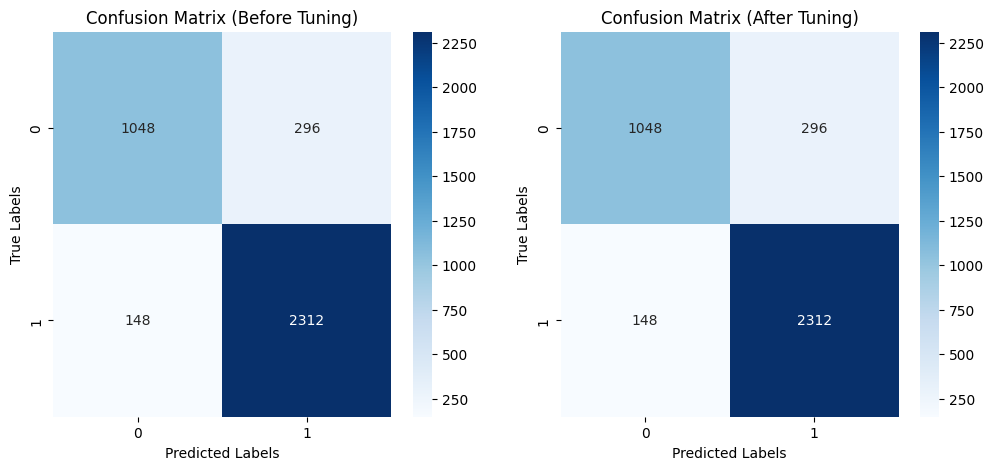

In [26]:

# Confusion Matrix Comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Before Tuning)')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(confusion_matrix(y_test, y_pred_optimized_rf), annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (After Tuning)')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()